In [66]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [67]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [68]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [69]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

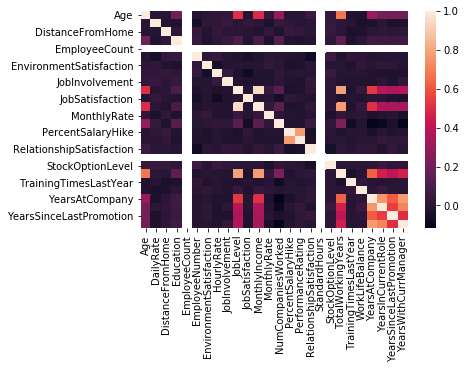

In [70]:
corr_heatmap=data.corr()
sns.heatmap(corr_heatmap)

In [71]:
data=data.drop([ 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18'],axis=1)

In [72]:
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,No,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,No,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2
5,32,No,1005,2,2,1,8,4,79,3,...,3,80,0,8,2,2,7,7,3,6
6,59,No,1324,3,3,1,10,3,81,4,...,1,80,3,12,3,2,1,0,0,0
7,30,No,1358,24,1,1,11,4,67,3,...,2,80,1,1,2,3,1,0,0,0
8,38,No,216,23,3,1,12,4,44,2,...,2,80,0,10,2,3,9,7,1,8
9,36,No,1299,27,3,1,13,3,94,3,...,2,80,2,17,3,2,7,7,7,7


In [73]:
data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [74]:
y=data.drop(['Age',  'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'] ,axis=1)

In [75]:
y

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
5,No
6,No
7,No
8,No
9,No


In [76]:
x=data.drop(['Attrition'] ,axis=1)

In [77]:
x

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
5,32,1005,2,2,1,8,4,79,3,1,...,3,80,0,8,2,2,7,7,3,6
6,59,1324,3,3,1,10,3,81,4,1,...,1,80,3,12,3,2,1,0,0,0
7,30,1358,24,1,1,11,4,67,3,1,...,2,80,1,1,2,3,1,0,0,0
8,38,216,23,3,1,12,4,44,2,3,...,2,80,0,10,2,3,9,7,1,8
9,36,1299,27,3,1,13,3,94,3,2,...,2,80,2,17,3,2,7,7,7,7


In [78]:
x.shape

(1470, 27)

In [79]:
y.shape

(1470, 1)

In [80]:
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [81]:
Num_val = {'Yes':1, 'No':0}
x['OverTime'] = x["OverTime"].apply(lambda x: Num_val[x])
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [83]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [84]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [85]:
lg=LogisticRegression()
print(cross_val_score(lg,x,y,cv=5).mean())

0.8700691211869719


In [86]:
#not icluding PCA because the performace is descreasing

In [87]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=48)

In [88]:
lg=LogisticRegression()
lg.fit(train_x,train_y) 
pred=lg.predict(test_x) 
print("accuracy_score:", accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

accuracy_score: 0.8703703703703703
[[267   8]
 [ 34  15]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       275
           1       0.65      0.31      0.42        49

   micro avg       0.87      0.87      0.87       324
   macro avg       0.77      0.64      0.67       324
weighted avg       0.85      0.87      0.85       324



In [89]:
svc=SVC(kernel='linear')
print(cross_val_score(svc,x,y,cv=5).mean())

0.8537563164329768


In [90]:
svc=SVC(kernel='poly')
print(cross_val_score(svc,x,y,cv=5).mean())

0.8462639732817984


In [91]:
svc=SVC(kernel='rbf')
print(cross_val_score(svc,x,y,cv=5).mean())

0.8578287407981067


In [92]:
dtc=DecisionTreeClassifier()
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7686775757332492


In [93]:
knc=KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knc,x,y,cv=5).mean())

0.8408333579281194


In [94]:
rf=RandomForestClassifier(n_estimators=100,random_state=40)
print(cross_val_score(rf,x,y,cv=5).mean())

0.8544157715148304


In [95]:
gnb=GaussianNB()
print(cross_val_score(gnb,x,y,cv=5).mean())

0.7877185286100327


In [96]:
from sklearn.metrics import r2_score
print(r2_score(test_y,pred))

-0.009870129870130029


In [99]:
from sklearn.metrics import mean_squared_error
print('error')
print(mean_squared_error(pred,test_y))

error
0.12962962962962962


In [100]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [102]:
y_pred_prob=lg.predict_proba(test_x)[:,0]
y_pred_prob

array([0.98671648, 0.95815289, 0.95832629, 0.74825625, 0.97519085,
       0.87151858, 0.60828321, 0.57549416, 0.36251909, 0.95815758,
       0.98529273, 0.89324017, 0.9850168 , 0.84580554, 0.98261797,
       0.98894796, 0.82814208, 0.97549393, 0.99478125, 0.91036346,
       0.98531521, 0.51692403, 0.3192161 , 0.91811343, 0.65091007,
       0.89953987, 0.53811285, 0.74205826, 0.97689267, 0.95351453,
       0.86781522, 0.96510933, 0.96137076, 0.99230681, 0.94608147,
       0.88521169, 0.94072379, 0.84820779, 0.97424831, 0.94476493,
       0.99686387, 0.86728248, 0.91173696, 0.87695699, 0.96959227,
       0.7930232 , 0.84884246, 0.56730923, 0.94782368, 0.77977177,
       0.90803124, 0.94628967, 0.97839532, 0.62653262, 0.99027356,
       0.995729  , 0.52273736, 0.88528494, 0.99194402, 0.90392863,
       0.81912428, 0.95261179, 0.97617247, 0.96407038, 0.96583209,
       0.7531547 , 0.21803269, 0.24263577, 0.40311045, 0.97748017,
       0.96971107, 0.62249172, 0.21919781, 0.99762509, 0.95244

In [103]:
tpr,fpr,thresholds=roc_curve(test_y,y_pred_prob)

In [104]:
tpr

array([0.        , 0.00363636, 0.08      , 0.08      , 0.17818182,
       0.17818182, 0.18545455, 0.18545455, 0.18909091, 0.18909091,
       0.29454545, 0.29454545, 0.32363636, 0.32363636, 0.33090909,
       0.33090909, 0.34909091, 0.34909091, 0.39636364, 0.39636364,
       0.42181818, 0.42181818, 0.42909091, 0.42909091, 0.51272727,
       0.51272727, 0.54181818, 0.54181818, 0.69818182, 0.69818182,
       0.71272727, 0.71272727, 0.76727273, 0.76727273, 0.78545455,
       0.78545455, 0.84      , 0.84      , 0.86545455, 0.86545455,
       0.86909091, 0.86909091, 0.88363636, 0.88363636, 0.89090909,
       0.89090909, 0.89818182, 0.89818182, 0.90181818, 0.90181818,
       0.90909091, 0.90909091, 0.91636364, 0.91636364, 0.93090909,
       0.93090909, 0.94545455, 0.94545455, 0.94909091, 0.94909091,
       0.97090909, 0.97090909, 0.98181818, 0.98181818, 0.98909091,
       0.98909091, 0.99636364, 0.99636364, 1.        ])

In [105]:
fpr

array([0.        , 0.        , 0.        , 0.02040816, 0.02040816,
       0.04081633, 0.04081633, 0.06122449, 0.06122449, 0.08163265,
       0.08163265, 0.10204082, 0.10204082, 0.12244898, 0.12244898,
       0.14285714, 0.14285714, 0.16326531, 0.16326531, 0.18367347,
       0.18367347, 0.20408163, 0.20408163, 0.2244898 , 0.2244898 ,
       0.24489796, 0.24489796, 0.26530612, 0.26530612, 0.28571429,
       0.28571429, 0.30612245, 0.30612245, 0.32653061, 0.32653061,
       0.34693878, 0.34693878, 0.3877551 , 0.3877551 , 0.40816327,
       0.40816327, 0.42857143, 0.42857143, 0.44897959, 0.44897959,
       0.46938776, 0.46938776, 0.48979592, 0.48979592, 0.51020408,
       0.51020408, 0.53061224, 0.53061224, 0.63265306, 0.63265306,
       0.65306122, 0.65306122, 0.67346939, 0.67346939, 0.69387755,
       0.69387755, 0.71428571, 0.71428571, 0.73469388, 0.73469388,
       0.75510204, 0.75510204, 1.        , 1.        ])

In [106]:
thresholds

array([1.99973225, 0.99973225, 0.99275823, 0.99269817, 0.98438627,
       0.9842131 , 0.98393041, 0.98386909, 0.98261797, 0.9823769 ,
       0.96908959, 0.96878207, 0.96487336, 0.96483205, 0.96404277,
       0.96360848, 0.96137076, 0.96093217, 0.9530928 , 0.9529022 ,
       0.95193701, 0.95183464, 0.95134527, 0.95097364, 0.92283572,
       0.92280242, 0.91731468, 0.91615967, 0.87406569, 0.87151858,
       0.85697307, 0.85272818, 0.83230762, 0.83104866, 0.81096954,
       0.8027681 , 0.76019788, 0.75804409, 0.7241308 , 0.72301267,
       0.71795241, 0.71616392, 0.68844969, 0.68365452, 0.67085914,
       0.65648081, 0.65004363, 0.64490114, 0.64168139, 0.63885956,
       0.62653262, 0.62249172, 0.61888052, 0.59504892, 0.58480995,
       0.57549416, 0.55438917, 0.55287185, 0.54546744, 0.53811285,
       0.50347865, 0.49346433, 0.4561518 , 0.41593425, 0.40311045,
       0.39579867, 0.36863306, 0.13661478, 0.11225154])

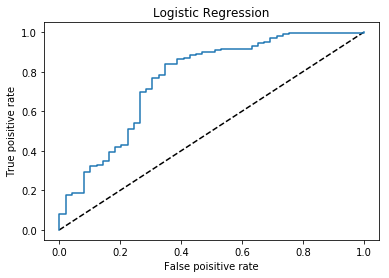

In [107]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False poisitive rate')
plt.ylabel('True poisitive rate')
plt.title('Logistic Regression')
plt.show()

In [110]:
    auc_score=roc_auc_score(test_y,lg.predict(test_x))
    auc_score

0.6385157699443414